In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Load the dataset
data = pd.read_csv('../../data/modelingData/Hong_Kong_International_Airport.csv')

data

,location,year,month,day,mean_windspeed,wind_direction,mean_tempurature,humidity,rainfall,duration,color
0,Chek Lap Kok,2019,1,1,18.4,360,12.3,65,Trace,0,Green
1,Chek Lap Kok,2019,1,2,16.5,350,13.5,65,Trace,0,Green
2,Chek Lap Kok,2019,1,3,9.2,360,14.7,77,Trace,0,Green
3,Chek Lap Kok,2019,1,4,14.4,320,17.9,84,0.3,0,Green
4,Chek Lap Kok,2019,1,5,12.6,320,18.0,89,Trace,0,Green
...,...,...,...,...,...,...,...,...,...,...,...
1912,Chek Lap Kok,2024,3,27,24.5,90,23.3,75,0,0,Green
1913,Chek Lap Kok,2024,3,28,11.1,80,24.9,77,0,0,Green
1914,Chek Lap Kok,2024,3,29,9.1,260,25.7,77,0,0,Green
1915,Chek Lap Kok,2024,3,30,11.1,150,26.8,74,0,0,Green


In [33]:
# Data Preprocessing

# Check for null values
null_values = data.isnull()
print("Null Values:")
print(null_values)
print("\nCount of Null Values in Each Column:")
print(null_values.sum())

Null Values:
       year  Month    Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     False  False  False           False           False             False   
1     False  False  False           False           False             False   
2     False  False  False           False           False             False   
3     False  False  False           False           False             False   
4     False  False  False           False           False             False   
...     ...    ...    ...             ...             ...               ...   
1912  False  False  False           False           False             False   
1913  False  False  False           False           False             False   
1914  False  False  False           False           False             False   
1915  False  False  False           False           False             False   
1916  False  False  False           False           False             False   

      Humidity  Rainfall  Duration  Co

In [73]:
# create data frame and check data types
df = pd.DataFrame(data)

# Check data types of columns
column_types = df.dtypes
print("Data Types of Columns:")
print(column_types)

Data Types of Columns:
year                  int64
Month                 int64
Day                   int64
Mean_Windspeed      float64
Wind_Direction        int64
Mean_Tempurature    float64
Humidity              int64
Rainfall             object
Duration              int64
Color                object
dtype: object


In [74]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Display numeric columns
print("Numeric Columns:")
print(numeric_columns)

Numeric Columns:
      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1912  2024      3   27            24.5              90              23.3   
1913  2024      3   28            11.1              80              24.9   
1914  2024      3   29             9.1             260              25.7   
1915  2024      3   30            11.1             150              26.8   
1916  2024      3   31            19.6             220              28.3   

      Humidity  Duration  
0           65         0  
1           65  

In [75]:
# Convert 'Rainfall' column to numeric with coerce to turn strings into NaN
numeric_values = pd.to_numeric(df['Rainfall'], errors='coerce')

# Count the number of NaN values, which represent strings
num_strings = numeric_values.isna().sum()

print("Number of string values in 'Rainfall' column:", num_strings)

string_records = df[pd.to_numeric(df['Rainfall'], errors='coerce').isna()]
print("String records in 'Rainfall' column:")
print(string_records)

Number of string values in 'Rainfall' column: 385
String records in 'Rainfall' column:
      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
4     2019      1    5            12.6             320              18.0   
5     2019      1    6            14.9             330              17.7   
...    ...    ...  ...             ...             ...               ...   
1888  2024      3    3            14.9              80              16.6   
1890  2024      3    5            19.7             200              25.8   
1898  2024      3   13            25.2              90              20.2   
1901  2024      3   16            16.8              70              22.2   
1903  2024      3   18            15.1              80              22.1   



In [76]:
# fill with previouse value fill missing values backward along columns
df['Rainfall'] = numeric_values.bfill(axis=0)

print("DataFrame with string records in 'Value' column replaced with 0:")
print(df)

DataFrame with string records in 'Value' column replaced with 0:
      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1912  2024      3   27            24.5              90              23.3   
1913  2024      3   28            11.1              80              24.9   
1914  2024      3   29             9.1             260              25.7   
1915  2024      3   30            11.1             150              26.8   
1916  2024      3   31            19.6             220              28.3   

      Humidity  Rainfa

In [77]:
# Feature Engineering
# # convert Wanring color string values to numeric values

type = {'Green': 0, 'Amber': 1, 'Red': 2, 'Black': 3 }
df['Color'] = df['Color'].map(type)

print(df)

      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1912  2024      3   27            24.5              90              23.3   
1913  2024      3   28            11.1              80              24.9   
1914  2024      3   29             9.1             260              25.7   
1915  2024      3   30            11.1             150              26.8   
1916  2024      3   31            19.6             220              28.3   

      Humidity  Rainfall  Duration  Color  
0           65       0.3         0      0  

In [78]:
# Add a colunm to save flood forcast % based on the warning type
type = {0: 20, 1: 40, 2: 60, 3: 80 }
df['Flood'] = df['Color'].map(type)

print(df)

      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1912  2024      3   27            24.5              90              23.3   
1913  2024      3   28            11.1              80              24.9   
1914  2024      3   29             9.1             260              25.7   
1915  2024      3   30            11.1             150              26.8   
1916  2024      3   31            19.6             220              28.3   

      Humidity  Rainfall  Duration  Color  Flood  
0           65       0.3         0  

In [79]:
#Create date column
df['Date'] = df['Day'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['year'].astype(str)

print(df)

      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1912  2024      3   27            24.5              90              23.3   
1913  2024      3   28            11.1              80              24.9   
1914  2024      3   29             9.1             260              25.7   
1915  2024      3   30            11.1             150              26.8   
1916  2024      3   31            19.6             220              28.3   

      Humidity  Rainfall  Duration  Color  Flood       Date  
0           65       0.3 

In [80]:
# Convert 'Date' column to datetime with explicit format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df.dtypes

year                         int64
Month                        int64
Day                          int64
Mean_Windspeed             float64
Wind_Direction               int64
Mean_Tempurature           float64
Humidity                     int64
Rainfall                   float64
Duration                     int64
Color                        int64
Flood                        int64
Date                datetime64[ns]
dtype: object

In [81]:
# set Date as index colunm
df.set_index('Date')
print(df)

      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1912  2024      3   27            24.5              90              23.3   
1913  2024      3   28            11.1              80              24.9   
1914  2024      3   29             9.1             260              25.7   
1915  2024      3   30            11.1             150              26.8   
1916  2024      3   31            19.6             220              28.3   

      Humidity  Rainfall  Duration  Color  Flood       Date  
0           65       0.3 

<Axes: >

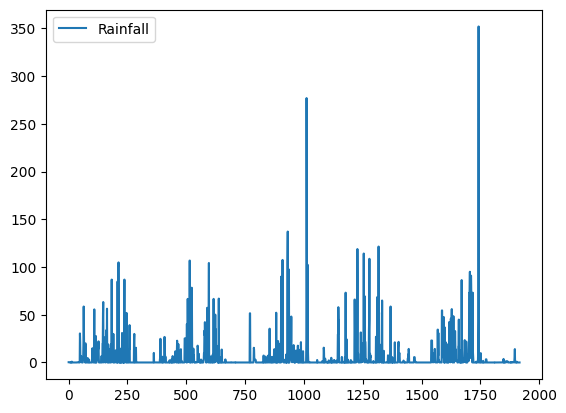

In [82]:
# Plot rainfall
df [['Rainfall']].plot()

<Axes: >

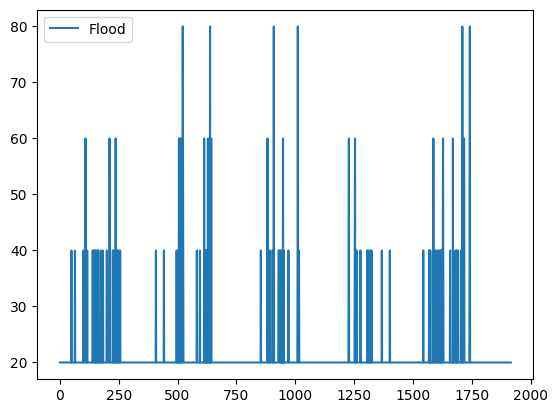

In [83]:
# Plot rainfall
df [['Flood']].plot()

In [84]:
# check null values before test
nan_values = df.isna().sum()
print(nan_values)

year                0
Month               0
Day                 0
Mean_Windspeed      0
Wind_Direction      0
Mean_Tempurature    0
Humidity            0
Rainfall            0
Duration            0
Color               0
Flood               0
Date                0
dtype: int64


In [85]:
# Split the data into train and test sets
X = df[['Date', 'Mean_Windspeed', 'Wind_Direction', 'Mean_Tempurature', 'Humidity', 'Duration','Rainfall']]
y = df['Flood']

print('Print teain model')
print(X)

print('Print test model')
print(y)

Print teain model
           Date  Mean_Windspeed  Wind_Direction  Mean_Tempurature  Humidity  \
0    2019-01-01            18.4             360              12.3        65   
1    2019-01-02            16.5             350              13.5        65   
2    2019-01-03             9.2             360              14.7        77   
3    2019-01-04            14.4             320              17.9        84   
4    2019-01-05            12.6             320              18.0        89   
...         ...             ...             ...               ...       ...   
1912 2024-03-27            24.5              90              23.3        75   
1913 2024-03-28            11.1              80              24.9        77   
1914 2024-03-29             9.1             260              25.7        77   
1915 2024-03-30            11.1             150              26.8        74   
1916 2024-03-31            19.6             220              28.3        74   

      Duration  Rainfall  
0     

In [87]:
# Traing the model
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Date'], axis = 1), y, test_size=0.2, random_state=42)

In [88]:
# Select a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Evaluate the model using mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.2986861196090556


In [90]:
# Predict rainfall for new data points
# For example:
new_data = pd.DataFrame({
    'Mean_Windspeed' : [10, 23, 23, 224, 34] 
    ,'Wind_Direction' : [100, 124, 134, 253, 56]
    ,'Mean_Tempurature': [25, 34, 45, 56, 77]
    ,'Humidity' : [60, 23, 56, 77, 88]
    ,'Duration' : [1160, 203, 556, 177, 10]
    ,'Rainfall' : [124, 46, 70, 21, 0.5]
    })
predicted_rainfall = model.predict(new_data)
print(predicted_rainfall)

[76.7228515  30.83603901 48.22410504 23.88208229 22.47753902]


In [91]:
import pickle

In [92]:
# loading the saved model
filename = 'flood_forecast_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('flood_forecast_model.sav', 'rb'))